### Covid Analysis
### Abed Tabbalat

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from bs4 import BeautifulSoup
import codecs
import requests
import json
import sqlite3 as db

This project is about Covid-19 data, will reformat data into the best shape possible from three sources and combine the necassary variables to give an output to inform viewers on highly important results regarding the pandemic.

In [2]:
# Settings
#Pandas number format settings to be set at 0 decimat places
# Step 5 adjusting pandas settings for formatting figures
pd.options.display.float_format = '{:,.0f}'.format
# Adding color settings from seaborn
colors = sns.color_palette('pastel')[0:10]

# Phase 1

In [5]:
# In this milestone, we will perform data wrangling techniques on the flat file that contains
# data on daily vaccinations by country
# The unique key identifier in all sources will be country
# Step 1 to import the flat file using Pandas
df_flat_raw = pd.read_csv('country_vaccinations.csv')
df_flat_raw.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0,0,NaN,NaN,NaN,0,0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [6]:
# Before doing any altering exercise, I will create a new variable name to keep the raw data stored as it is
# Will need to change the column names, in order to do that we need to see what the column names are
# Will use the list() function to call a list of the column names
df_flat = df_flat_raw
list(df_flat.columns)

['country',
 'iso_code',
 'date',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'daily_vaccinations_raw',
 'daily_vaccinations',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'people_fully_vaccinated_per_hundred',
 'daily_vaccinations_per_million',
 'vaccines',
 'source_name',
 'source_website']

In [7]:
# Step 2: Updating column headers using the column attribute:
df_flat.columns = ['Country', 'ISO Code', 'Date','Total_Vaccinations', 
                    'People_Vaccinated', 'People_Fully_Vaccinated', 'Daily_Vaccinations_Raw',
                    'Daily_Vaccinations', 'Total_Vaccinations/100', 'People_Vaccinated/100', 
                    'People_Fully_Vaccinated/100', 'Daily_Vaccinations/Mil', 'Vaccines',
                    'Source_Name_Vaccinations', 'Source_Website_Vaccinations']
df_flat.head()

,Country,ISO Code,Date,Total_Vaccinations,People_Vaccinated,People_Fully_Vaccinated,Daily_Vaccinations_Raw,Daily_Vaccinations,Total_Vaccinations/100,People_Vaccinated/100,People_Fully_Vaccinated/100,Daily_Vaccinations/Mil,Vaccines,Source_Name_Vaccinations,Source_Website_Vaccinations
0,Afghanistan,AFG,2021-02-22,0,0,NaN,NaN,NaN,0,0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,"1,367",NaN,NaN,NaN,34,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [8]:
# Step 3: is to remove columns that wont be needed for the project
# The columns that will remain are shown below
df_flat_1 = df_flat[['Country', 'Total_Vaccinations', 'People_Vaccinated']]
df_flat_1


,Country,Total_Vaccinations,People_Vaccinated
0,Afghanistan,0,0
1,Afghanistan,NaN,NaN
2,Afghanistan,NaN,NaN
3,Afghanistan,NaN,NaN
4,Afghanistan,NaN,NaN
...,...,...,...
71810,Zimbabwe,"7,432,819","4,204,134"
71811,Zimbabwe,"7,438,485","4,206,370"
71812,Zimbabwe,"7,446,076","4,210,000"
71813,Zimbabwe,"7,458,519","4,216,112"


In [9]:
# Step 4: will summarize the data to have 1 country as a unique ID by using groupby() function
# Using mean since some countries have missing reported dates of vaccinations
df_flat_1 = df_flat_1.groupby('Country').mean().reset_index()
df_flat_1

,Country,Total_Vaccinations,People_Vaccinated
0,Afghanistan,"1,588,162","1,335,322"
1,Albania,"1,095,255","727,809"
2,Algeria,"9,435,633","5,414,206"
3,Andorra,"44,010","29,327"
4,Angola,"4,244,810","2,800,567"
...,...,...,...
218,Wales,"3,626,606","1,931,716"
219,Wallis and Futuna,"8,834","4,836"
220,Yemen,"318,941","265,881"
221,Zambia,"638,290","187,488"


In [10]:
# Step 5 is to check for duplicates
print(f'Any duplicated country: {any(df_flat_1.duplicated())}')
# Result confirms no duplicates

Any duplicated country: False


In [11]:
# Step 6 is to check for NULLS in the dataframe
print(f'Any NULLS in Total Vaccinations: {df_flat_1["Total_Vaccinations"].isnull().values.any()}')
print(f'Any NULLS in People Vaccinated: {df_flat_1["People_Vaccinated"].isnull().values.any()}')
# Result makes sense because using the groupby() function and applying mean() should eliminate the NULLS

Any NULLS in Total Vaccinations: False
Any NULLS in People Vaccinated: False


In [12]:
# Step 7: Data shape is ready for phase 2.
df_flat_1

,Country,Total_Vaccinations,People_Vaccinated
0,Afghanistan,"1,588,162","1,335,322"
1,Albania,"1,095,255","727,809"
2,Algeria,"9,435,633","5,414,206"
3,Andorra,"44,010","29,327"
4,Angola,"4,244,810","2,800,567"
...,...,...,...
218,Wales,"3,626,606","1,931,716"
219,Wallis and Futuna,"8,834","4,836"
220,Yemen,"318,941","265,881"
221,Zambia,"638,290","187,488"


# Phase 2

In [13]:
# using pandas to read html. had issues with forbidden HTTP and therefore I used the help of a post in
# stackoverflow to import the requests package and place the header to call the HTML site
url = 'https://www.worldometers.info/world-population/population-by-country/'
header = {
  "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.75 Safari/537.36",
  "X-Requested-With": "XMLHttpRequest"
}

In [14]:
# Used the requests.get function to call the website (similar to APIs) and the table is now readable.
r = requests.get(url, headers=header)
dfs_web = pd.read_html(r.text)

In [15]:
# Checking how many dataframes the website contains. Looking at the web page there is only one table
len(dfs_web)

1

In [16]:
# defining the table to begin data wrangling process.
df_web_raw = dfs_web[0]
df_web_raw

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,"-348,399",1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,"-532,687",2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,"954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,"-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,"-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [17]:
# Step 1: Updating column headers using the column attribute:
# Will call a list to see the full column names
df_web = df_web_raw
list(df_web.columns)


['#',
 'Country (or dependency)',
 'Population (2020)',
 'Yearly Change',
 'Net Change',
 'Density (P/Km²)',
 'Land Area (Km²)',
 'Migrants (net)',
 'Fert. Rate',
 'Med. Age',
 'Urban Pop %',
 'World Share']

In [18]:
# Renaming columns for more clarity.
df_web.columns = ['#', 'Country', 'Population', 'Yearly_Change', 'Net_Change', 'Density', 'Land_Area', 
                  'Migrants', 'Fertility_Rate', 'Median_Age', 'Urban_Population_Percentage', 'World_Share']
df_web

,#,Country,Population,Yearly_Change,Net_Change,Density,Land_Area,Migrants,Fertility_Rate,Median_Age,Urban_Population_Percentage,World_Share
0,1,China,1439323776,0.39 %,5540090,153,9388211,"-348,399",1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,"-532,687",2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,"954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,"-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,"-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,4992,0.06 %,3,50,100,NaN,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,3480,3.05 %,103,0,12170,NaN,N.A.,N.A.,66 %,0.00 %
232,233,Niue,1626,0.68 %,11,6,260,NaN,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,1357,1.27 %,17,136,10,NaN,N.A.,N.A.,0 %,0.00 %


In [19]:
# Step 2 will need from this dataset the Country column and the Population column as the rest of the data
# is irrelevant to this project
df_web_1 = df_web[['Country', 'Population']]
df_web_1

,Country,Population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340
...,...,...
230,Montserrat,4992
231,Falkland Islands,3480
232,Niue,1626
233,Tokelau,1357


In [20]:
# Step 3 is to make sure there are no NA's or N.A (this was visible in the original dataframe).
# first replacing N.A. (if any) to None to give NaNs that Pandas identify.
df_web_1.replace('N.A.', None)

,Country,Population
0,China,1439323776
1,India,1380004385
2,United States,331002651
3,Indonesia,273523615
4,Pakistan,220892340
...,...,...
230,Montserrat,4992
231,Falkland Islands,3480
232,Niue,1626
233,Tokelau,1357


In [21]:
# Checking for NaNs and Duplicates
print(f'Any duplicated country: {any(df_web_1.duplicated())}')
print(f'Any NULLS in Population: {df_web_1["Population"].isnull().values.any()}')
# Result shows no duplicates nor NaNs

Any duplicated country: False
Any NULLS in Population: False


In [22]:
# Step 4 updating the Population column format
# Population column not being formatted and this is because is set as int and will convert to float
# first step is to use dtypes on the dataframe to determine which columns needs to be changed
df_web_1.dtypes

Country       object
Population     int64
dtype: object

In [23]:
# Will change the Population column type to float by using astype() function
df_web_1 = df_web_1.astype({'Population' : 'float64'})

In [24]:
# Data is in shape and ready for Phase 3
df_web_1

,Country,Population
0,China,"1,439,323,776"
1,India,"1,380,004,385"
2,United States,"331,002,651"
3,Indonesia,"273,523,615"
4,Pakistan,"220,892,340"
...,...,...
230,Montserrat,"4,992"
231,Falkland Islands,"3,480"
232,Niue,"1,626"
233,Tokelau,"1,357"


# Phase 3

In [25]:
# Calling api url using requests library
api_url = 'https://services1.arcgis.com/0MSEUqKaxRlEPj5g/arcgis/rest/services/ncov_cases2_v1/FeatureServer/2/query?where=1%3D1&outFields=*&returnGeometry=false&outSR=4326&f=json'
response = requests.get(api_url)
response
# 200 means the request is successful

<Response [200]>

In [26]:
# Extracting data from the request using json()
json = response.json()
json

{'objectIdFieldName': 'OBJECTID',
 'uniqueIdField': {'name': 'OBJECTID', 'isSystemMaintained': True},
 'globalIdFieldName': '',
 'geometryType': 'esriGeometryPoint',
 'spatialReference': {'wkid': 4326, 'latestWkid': 4326},
 'fields': [{'name': 'OBJECTID',
   'type': 'esriFieldTypeOID',
   'alias': 'OBJECTID',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None},
  {'name': 'Country_Region',
   'type': 'esriFieldTypeString',
   'alias': 'Country/Region',
   'sqlType': 'sqlTypeOther',
   'length': 256,
   'domain': None,
   'defaultValue': None},
  {'name': 'Last_Update',
   'type': 'esriFieldTypeDate',
   'alias': 'Last Update',
   'sqlType': 'sqlTypeOther',
   'length': 8,
   'domain': None,
   'defaultValue': None},
  {'name': 'Lat',
   'type': 'esriFieldTypeDouble',
   'alias': 'Latitude',
   'sqlType': 'sqlTypeOther',
   'domain': None,
   'defaultValue': None},
  {'name': 'Long_',
   'type': 'esriFieldTypeDouble',
   'alias': 'Longitude',
   'sqlType': 'sqlType

In [27]:
json.keys()

dict_keys(['objectIdFieldName', 'uniqueIdField', 'globalIdFieldName', 'geometryType', 'spatialReference', 'fields', 'features'])

In [28]:
df_api_fields = pd.DataFrame(json['fields'])
df_api_fields

,name,type,alias,sqlType,domain,defaultValue,length
0,OBJECTID,esriFieldTypeOID,OBJECTID,sqlTypeOther,None,None,NaN
1,Country_Region,esriFieldTypeString,Country/Region,sqlTypeOther,None,None,256
2,Last_Update,esriFieldTypeDate,Last Update,sqlTypeOther,None,None,8
3,Lat,esriFieldTypeDouble,Latitude,sqlTypeOther,None,None,NaN
4,Long_,esriFieldTypeDouble,Longitude,sqlTypeOther,None,None,NaN
5,Confirmed,esriFieldTypeInteger,Confirmed,sqlTypeOther,None,None,NaN
6,Deaths,esriFieldTypeInteger,Deaths,sqlTypeOther,None,None,NaN
7,Recovered,esriFieldTypeInteger,Recovered,sqlTypeOther,None,None,NaN
8,Active,esriFieldTypeInteger,Active,sqlTypeOther,None,None,NaN
9,Incident_Rate,esriFieldTypeDouble,Incident Rate,sqlTypeOther,None,None,NaN


In [29]:
# Printing the first object to see what the keys are in the API
print(json['features'][0]['attributes'])

{'OBJECTID': 1, 'Country_Region': 'Afghanistan', 'Last_Update': 1646346074000, 'Lat': 33.93911, 'Long_': 67.709953, 'Confirmed': 174214, 'Deaths': 7619, 'Recovered': None, 'Active': None, 'Incident_Rate': 447.524850853521, 'People_Tested': None, 'People_Hospitalized': None, 'Mortality_Rate': 4.37335690587438, 'UID': 4, 'ISO3': 'AFG'}


In [30]:
# Creating a for loop to add all data needed in API to a dataframe
rows = []
for row in json['features']:
    rows.append(row['attributes'])
print(rows)

[{'OBJECTID': 1, 'Country_Region': 'Afghanistan', 'Last_Update': 1646346074000, 'Lat': 33.93911, 'Long_': 67.709953, 'Confirmed': 174214, 'Deaths': 7619, 'Recovered': None, 'Active': None, 'Incident_Rate': 447.524850853521, 'People_Tested': None, 'People_Hospitalized': None, 'Mortality_Rate': 4.37335690587438, 'UID': 4, 'ISO3': 'AFG'}, {'OBJECTID': 2, 'Country_Region': 'Albania', 'Last_Update': 1646346074000, 'Lat': 41.1533, 'Long_': 20.1683, 'Confirmed': 271825, 'Deaths': 3474, 'Recovered': None, 'Active': None, 'Incident_Rate': 9445.58343178817, 'People_Tested': None, 'People_Hospitalized': None, 'Mortality_Rate': 1.27802814310678, 'UID': 8, 'ISO3': 'ALB'}, {'OBJECTID': 3, 'Country_Region': 'Algeria', 'Last_Update': 1646346074000, 'Lat': 28.0339, 'Long_': 1.6596, 'Confirmed': 265079, 'Deaths': 6843, 'Recovered': None, 'Active': None, 'Incident_Rate': 604.498734499884, 'People_Tested': None, 'People_Hospitalized': None, 'Mortality_Rate': 2.58149457331588, 'UID': 12, 'ISO3': 'DZA'}, {'

In [31]:
# Converting the list to a dataframe
df_api_features = pd.DataFrame(rows)
df_api_features

,OBJECTID,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3
0,1,Afghanistan,1646346074000,34,68,174214,7619,None,None,448,None,None,4,4,AFG
1,2,Albania,1646346074000,41,20,271825,3474,None,None,"9,446",None,None,1,8,ALB
2,3,Algeria,1646346074000,28,2,265079,6843,None,None,604,None,None,3,12,DZA
3,4,Andorra,1646346074000,43,2,38342,151,None,None,"49,624",None,None,0,20,AND
4,5,Angola,1646346074000,-11,18,98746,1900,None,None,300,None,None,2,24,AGO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,194,West Bank and Gaza,1646346074000,32,35,649110,5542,None,None,"12,724",None,None,1,275,PSE
194,195,Winter Olympics 2022,1646346074000,40,116,526,0,None,None,NaN,None,None,0,2022,None
195,196,Yemen,1646346074000,16,49,11771,2135,None,None,39,None,None,18,887,YEM
196,197,Zambia,1646346074000,-13,28,313394,3957,None,None,"1,705",None,None,1,894,ZMB


In [32]:
# We will need 3 columns from the dataframe for the project, Country_Region, Confirmed, and Deaths
df_api = df_api_features[['Country_Region', 'Confirmed', 'Deaths']]
df_api

,Country_Region,Confirmed,Deaths
0,Afghanistan,174214,7619
1,Albania,271825,3474
2,Algeria,265079,6843
3,Andorra,38342,151
4,Angola,98746,1900
...,...,...,...
193,West Bank and Gaza,649110,5542
194,Winter Olympics 2022,526,0
195,Yemen,11771,2135
196,Zambia,313394,3957


In [36]:
# Renaming the columns
df_api.columns = ['Country', 'Confirmed_Cases', 'Deaths']
df_api

,Country,Confirmed_Cases,Deaths
0,Afghanistan,"174,214","7,619"
1,Albania,"271,825","3,474"
2,Algeria,"265,079","6,843"
3,Andorra,"38,342",151
4,Angola,"98,746","1,900"
...,...,...,...
193,West Bank and Gaza,"649,110","5,542"
194,Winter Olympics 2022,526,0
195,Yemen,"11,771","2,135"
196,Zambia,"313,394","3,957"


In [37]:
# Checking for column types
df_api.dtypes

Country             object
Confirmed_Cases    float64
Deaths             float64
dtype: object

In [39]:
# Converting Confirmed Cases and Deaths to float
df_api = df_api.astype({'Confirmed_Cases' : 'float64', 'Deaths' : 'float64'})
df_api.dtypes

Country             object
Confirmed_Cases    float64
Deaths             float64
dtype: object

In [40]:
# Performing a Nan check and duplicate check
# Checking for NaNs and Duplicates
print(f'Any duplicated Country: {any(df_api.duplicated())}')
print(f'Any NULLS in Confirmed: {df_api["Confirmed_Cases"].isnull().values.any()}')
print(f'Any NULLS in Deaths: {df_api["Deaths"].isnull().values.any()}')
# Result shows no duplicates nor NaNs

Any duplicated Country: False
Any NULLS in Confirmed: False
Any NULLS in Deaths: False


In [41]:
# Replacing US with United States
df_api['Country'] = df_api['Country'].replace(['US'], 'United States')

In [42]:
# Data is in shape and ready for Phase 4
df_api

,Country,Confirmed_Cases,Deaths
0,Afghanistan,"174,214","7,619"
1,Albania,"271,825","3,474"
2,Algeria,"265,079","6,843"
3,Andorra,"38,342",151
4,Angola,"98,746","1,900"
...,...,...,...
193,West Bank and Gaza,"649,110","5,542"
194,Winter Olympics 2022,526,0
195,Yemen,"11,771","2,135"
196,Zambia,"313,394","3,957"


# Phase 4

In [43]:
# Creating new database to load all current dataframes seperately in each table
conn = db.connect('Covid_DB')
c = conn.cursor()
df_flat_1.to_sql(name='Vaccine_Table', con=conn)

In [44]:
# Querying the table for the flat file to show all data
flat_cursor = c.execute('SELECT * FROM Vaccine_Table')
flat_cursor.fetchall()

[(0, 'Afghanistan', 1588162.0294117648, 1335322.322580645),
 (1, 'Albania', 1095255.4549356224, 727808.9055555556),
 (2, 'Algeria', 9435632.523809524, 5414205.714285715),
 (3, 'Andorra', 44010.166666666664, 29327.032258064515),
 (4, 'Angola', 4244809.592592592, 2800566.846153846),
 (5, 'Anguilla', 14209.628571428571, 8045.428571428572),
 (6, 'Antigua and Barbuda', 72541.85714285714, 41749.614457831325),
 (7, 'Argentina', 30660434.426934097, 19028514.793002915),
 (8, 'Armenia', 590353.3333333334, 379271.1142857143),
 (9, 'Aruba', 134149.4646017699, 72409.82743362832),
 (10, 'Australia', 18535184.81707317, 10419057.274390243),
 (11, 'Austria', 7488568.041131105, 3892518.1002570693),
 (12, 'Azerbaijan', 6004790.207746479, 3114344.7232472324),
 (13, 'Bahamas', 141678.06818181818, 76287.28205128205),
 (14, 'Bahrain', 2047504.7302052786, 855131.2577319588),
 (15, 'Bangladesh', 32533880.51869159, 20664825.733644858),
 (16, 'Barbados', 183518.2108626198, 106051.81789137381),
 (17, 'Belarus', 3

In [45]:
# Adding the world population table from the web dataframe
df_web_1.to_sql(name='Population_Table', con=conn)

In [46]:
# Querying the table for the web dataframe to show all data
web_cursor = c.execute('SELECT * FROM Population_Table')
web_cursor.fetchall()

[(0, 'China', 1439323776.0),
 (1, 'India', 1380004385.0),
 (2, 'United States', 331002651.0),
 (3, 'Indonesia', 273523615.0),
 (4, 'Pakistan', 220892340.0),
 (5, 'Brazil', 212559417.0),
 (6, 'Nigeria', 206139589.0),
 (7, 'Bangladesh', 164689383.0),
 (8, 'Russia', 145934462.0),
 (9, 'Mexico', 128932753.0),
 (10, 'Japan', 126476461.0),
 (11, 'Ethiopia', 114963588.0),
 (12, 'Philippines', 109581078.0),
 (13, 'Egypt', 102334404.0),
 (14, 'Vietnam', 97338579.0),
 (15, 'DR Congo', 89561403.0),
 (16, 'Turkey', 84339067.0),
 (17, 'Iran', 83992949.0),
 (18, 'Germany', 83783942.0),
 (19, 'Thailand', 69799978.0),
 (20, 'United Kingdom', 67886011.0),
 (21, 'France', 65273511.0),
 (22, 'Italy', 60461826.0),
 (23, 'Tanzania', 59734218.0),
 (24, 'South Africa', 59308690.0),
 (25, 'Myanmar', 54409800.0),
 (26, 'Kenya', 53771296.0),
 (27, 'South Korea', 51269185.0),
 (28, 'Colombia', 50882891.0),
 (29, 'Spain', 46754778.0),
 (30, 'Uganda', 45741007.0),
 (31, 'Argentina', 45195774.0),
 (32, 'Algeria', 4

In [47]:
# Adding the cases and deaths table from the api dataframe
df_api.to_sql(name='Cases_Table', con=conn)

In [48]:
# Querying the table for the api dataframe to show all data
api_cursor = c.execute('SELECT * FROM Cases_Table')
api_cursor.fetchall()

[(0, 'Afghanistan', 174214.0, 7619.0),
 (1, 'Albania', 271825.0, 3474.0),
 (2, 'Algeria', 265079.0, 6843.0),
 (3, 'Andorra', 38342.0, 151.0),
 (4, 'Angola', 98746.0, 1900.0),
 (5, 'Antarctica', 11.0, 0.0),
 (6, 'Antigua and Barbuda', 7449.0, 135.0),
 (7, 'Argentina', 8912317.0, 126390.0),
 (8, 'Armenia', 420757.0, 8505.0),
 (9, 'Australia', 3297215.0, 5317.0),
 (10, 'Austria', 2775589.0, 14924.0),
 (11, 'Azerbaijan', 787937.0, 9473.0),
 (12, 'Bahamas', 33150.0, 771.0),
 (13, 'Bahrain', 519584.0, 1455.0),
 (14, 'Bangladesh', 1945765.0, 29058.0),
 (15, 'Barbados', 55543.0, 316.0),
 (16, 'Belarus', 925515.0, 6521.0),
 (17, 'Belgium', 3571579.0, 30217.0),
 (18, 'Belize', 56816.0, 650.0),
 (19, 'Benin', 26575.0, 163.0),
 (20, 'Bhutan', 13846.0, 6.0),
 (21, 'Bolivia', 893775.0, 21443.0),
 (22, 'Bosnia and Herzegovina', 371846.0, 15505.0),
 (23, 'Botswana', 263950.0, 2619.0),
 (24, 'Brazil', 28906672.0, 650824.0),
 (25, 'Brunei', 76534.0, 135.0),
 (26, 'Bulgaria', 1096194.0, 35696.0),
 (27, '

In [53]:
# Creating query to join all table components using JOIN command in SQL
query = """
    SELECT
    PT.COUNTRY,
    PT.Population,
    VT.Total_Vaccinations,
    VT.People_Vaccinated,
    CT.Confirmed_Cases,
    CT.Deaths
FROM Population_Table PT
LEFT JOIN Vaccine_Table VT ON PT.COUNTRY = VT.COUNTRY
LEFT JOIN Cases_Table CT ON PT.COUNTRY = CT.COUNTRY;"""
comb_1 = c.execute(query)
comb_1.fetchall()

[('China', 1439323776.0, 1567168888.2911391, 1112658000.0, 403780.0, 6002.0),
 ('India',
  1380004385.0,
  565651741.3314763,
  388918233.2562674,
  42945160.0,
  514388.0),
 ('United States',
  331002651.0,
  291080271.6600496,
  156509396.9255583,
  79183010.0,
  955691.0),
 ('Indonesia',
  273523615.0,
  99361085.47025496,
  61393156.26345609,
  5667355.0,
  149268.0),
 ('Pakistan',
  220892340.0,
  71941104.88157895,
  50982973.63636363,
  1511754.0,
  30237.0),
 ('Brazil',
  212559417.0,
  146020222.03867403,
  87994273.74301676,
  28906672.0,
  650824.0),
 ('Nigeria', 206139589.0, 5049794.81, 3672149.87, 254598.0, 3142.0),
 ('Bangladesh',
  164689383.0,
  32533880.51869159,
  20664825.733644858,
  1945765.0,
  29058.0),
 ('Russia',
  145934462.0,
  68031752.5168919,
  36547460.61904762,
  16445802.0,
  346967.0),
 ('Mexico',
  128932753.0,
  55713822.23738872,
  36067038.289634146,
  5534086.0,
  318835.0),
 ('Japan', 126476461.0, 82617644.032, 45205623.292, 5214086.0, 24398.0),


In [54]:
df_comb = pd.read_sql_query(query, conn)
df_comb

,Country,Population,Total_Vaccinations,People_Vaccinated,Confirmed_Cases,Deaths
0,China,"1,439,323,776","1,567,168,888","1,112,658,000","403,780","6,002"
1,India,"1,380,004,385","565,651,741","388,918,233","42,945,160","514,388"
2,United States,"331,002,651","291,080,272","156,509,397","79,183,010","955,691"
3,Indonesia,"273,523,615","99,361,085","61,393,156","5,667,355","149,268"
4,Pakistan,"220,892,340","71,941,105","50,982,974","1,511,754","30,237"
...,...,...,...,...,...,...
230,Montserrat,"4,992","2,374","1,328",NaN,NaN
231,Falkland Islands,"3,480","2,360","1,778",NaN,NaN
232,Niue,"1,626","1,066",771,NaN,NaN
233,Tokelau,"1,357",964,722,NaN,NaN


In [56]:
# Will add a few additional columns to calculate the ratio of each variable to the total population
df_comb['Vaccination_Ratio'] = df_comb['Total_Vaccinations'] / df_comb['Population'] * 100
df_comb['People_Vac_Ratio'] = df_comb['People_Vaccinated'] / df_comb['Population'] * 100
df_comb['Cases_Ratio'] = df_comb['Confirmed_Cases'] / df_comb['Population'] * 100
df_comb['Death_Ratio'] = df_comb['Deaths'] / df_comb['Population'] * 100

df_comb

,Country,Population,Total_Vaccinations,People_Vaccinated,Confirmed_Cases,Deaths,Vaccination_Ratio,People_Vac_Ratio,Cases_Ratio,Death_Ratio
0,China,"1,439,323,776","1,567,168,888","1,112,658,000","403,780","6,002",109,77,0,0
1,India,"1,380,004,385","565,651,741","388,918,233","42,945,160","514,388",41,28,3,0
2,United States,"331,002,651","291,080,272","156,509,397","79,183,010","955,691",88,47,24,0
3,Indonesia,"273,523,615","99,361,085","61,393,156","5,667,355","149,268",36,22,2,0
4,Pakistan,"220,892,340","71,941,105","50,982,974","1,511,754","30,237",33,23,1,0
...,...,...,...,...,...,...,...,...,...,...
230,Montserrat,"4,992","2,374","1,328",NaN,NaN,48,27,NaN,NaN
231,Falkland Islands,"3,480","2,360","1,778",NaN,NaN,68,51,NaN,NaN
232,Niue,"1,626","1,066",771,NaN,NaN,66,47,NaN,NaN
233,Tokelau,"1,357",964,722,NaN,NaN,71,53,NaN,NaN


In [57]:
# Loading combined dataframe with all datasets into database
df_comb.to_sql(name='Combined_Table', con=conn)

In [58]:
# Querying the combined table to show all data
comb_cursor = c.execute('SELECT * FROM Combined_Table')
comb_cursor.fetchall()

[(0,
  'China',
  1439323776.0,
  1567168888.2911391,
  1112658000.0,
  403780.0,
  6002.0,
  108.88230392792033,
  77.30421872778123,
  0.02805345167868609,
  0.0004170013794033234),
 (1,
  'India',
  1380004385.0,
  565651741.3314763,
  388918233.2562674,
  42945160.0,
  514388.0,
  40.98912637378876,
  28.182391120175133,
  3.111958227582009,
  0.03727437431294829),
 (2,
  'United States',
  331002651.0,
  291080271.6600496,
  156509396.9255583,
  79183010.0,
  955691.0,
  87.93895480312925,
  47.28342702172446,
  23.922167922455703,
  0.2887260863659971),
 (3,
  'Indonesia',
  273523615.0,
  99361085.47025496,
  61393156.26345609,
  5667355.0,
  149268.0,
  36.32632797363948,
  22.445285487856722,
  2.0719801469427055,
  0.054572253295204515),
 (4,
  'Pakistan',
  220892340.0,
  71941104.88157895,
  50982973.63636363,
  1511754.0,
  30237.0,
  32.56840182035237,
  23.080462471611117,
  0.6843849813895765,
  0.013688568829503096),
 (5,
  'Brazil',
  212559417.0,
  146020222.03867403

In [59]:
# Filtering for the top 10 countries
df_comb_vis = df_comb.head(10)
df_comb_vis

,Country,Population,Total_Vaccinations,People_Vaccinated,Confirmed_Cases,Deaths,Vaccination_Ratio,People_Vac_Ratio,Cases_Ratio,Death_Ratio
0,China,"1,439,323,776","1,567,168,888","1,112,658,000","403,780","6,002",109,77,0,0
1,India,"1,380,004,385","565,651,741","388,918,233","42,945,160","514,388",41,28,3,0
2,United States,"331,002,651","291,080,272","156,509,397","79,183,010","955,691",88,47,24,0
3,Indonesia,"273,523,615","99,361,085","61,393,156","5,667,355","149,268",36,22,2,0
4,Pakistan,"220,892,340","71,941,105","50,982,974","1,511,754","30,237",33,23,1,0
5,Brazil,"212,559,417","146,020,222","87,994,274","28,906,672","650,824",69,41,14,0
6,Nigeria,"206,139,589","5,049,795","3,672,150","254,598","3,142",2,2,0,0
7,Bangladesh,"164,689,383","32,533,881","20,664,826","1,945,765","29,058",20,13,1,0
8,Russia,"145,934,462","68,031,753","36,547,461","16,445,802","346,967",47,25,11,0
9,Mexico,"128,932,753","55,713,822","36,067,038","5,534,086","318,835",43,28,4,0


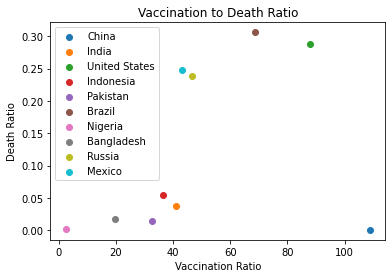

In [60]:
# Creating a scatter plot to show the ratios of the top 10 high populated countries vaccination to death ratio
plt.scatter(df_comb_vis['Vaccination_Ratio'][0], df_comb_vis['Death_Ratio'][0])
plt.scatter(df_comb_vis['Vaccination_Ratio'][1], df_comb_vis['Death_Ratio'][1])
plt.scatter(df_comb_vis['Vaccination_Ratio'][2], df_comb_vis['Death_Ratio'][2])
plt.scatter(df_comb_vis['Vaccination_Ratio'][3], df_comb_vis['Death_Ratio'][3])
plt.scatter(df_comb_vis['Vaccination_Ratio'][4], df_comb_vis['Death_Ratio'][4])
plt.scatter(df_comb_vis['Vaccination_Ratio'][5], df_comb_vis['Death_Ratio'][5])
plt.scatter(df_comb_vis['Vaccination_Ratio'][6], df_comb_vis['Death_Ratio'][6])
plt.scatter(df_comb_vis['Vaccination_Ratio'][7], df_comb_vis['Death_Ratio'][7])
plt.scatter(df_comb_vis['Vaccination_Ratio'][8], df_comb_vis['Death_Ratio'][8])
plt.scatter(df_comb_vis['Vaccination_Ratio'][9], df_comb_vis['Death_Ratio'][9])
plt.xlabel('Vaccination Ratio')
plt.ylabel('Death Ratio')
plt.legend(df_comb_vis['Country'])
plt.title('Vaccination to Death Ratio')
plt.show()

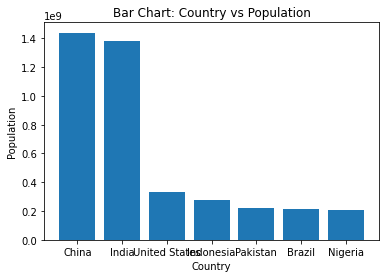

In [61]:
# Creating a barchart for the top 5 total population countries
plt.bar(df_comb_vis['Country'].head(7), df_comb_vis['Population'].head(7))
plt.xlabel("Country")
plt.ylabel("Population")
plt.title("Bar Chart: Country vs Population")
plt.show()

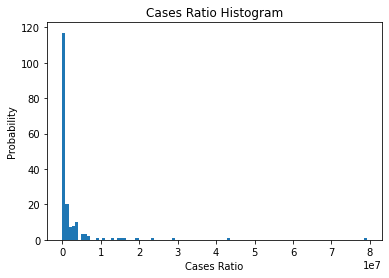

In [62]:
# Histogram on the Cases Confirmed, will use entire dataset
plt.hist(df_comb['Confirmed_Cases'], density=False, bins=100)
plt.ylabel('Probability')
plt.xlabel('Cases Ratio')
plt.title("Cases Ratio Histogram")
plt.show()

C:\Users\abedt\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='People_Vaccinated', ylabel='Density'>

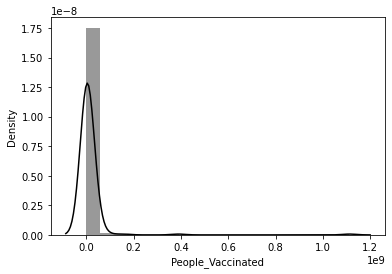

In [63]:
# Density plot on People Vaccinated
df_web_density = df_web
sns.distplot(df_comb['People_Vaccinated'], bins=20, color = 'k')

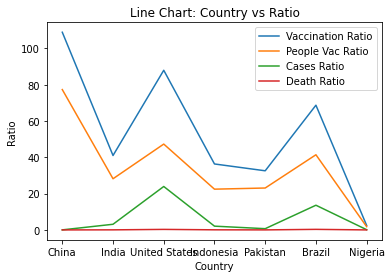

In [64]:
# creating a line graph for all ratios
plt.plot(df_comb_vis['Country'].head(7), df_comb_vis['Vaccination_Ratio'].head(7))
plt.plot(df_comb_vis['Country'].head(7), df_comb_vis['People_Vac_Ratio'].head(7))
plt.plot(df_comb_vis['Country'].head(7), df_comb_vis['Cases_Ratio'].head(7))
plt.plot(df_comb_vis['Country'].head(7), df_comb_vis['Death_Ratio'].head(7))

plt.xlabel("Country")
plt.ylabel("Ratio")
plt.legend(['Vaccination Ratio', 'People Vac Ratio', 'Cases Ratio', 'Death Ratio'])
plt.title("Line Chart: Country vs Ratio")
plt.show()

In [65]:
# Closing Database
conn.close()